In [1]:
%matplotlib notebook

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import scipy.stats as stats

In [23]:
# Read file with Net Migration numbers with origin and destination
Total_countries_GDP= pd.read_csv("../Output/Data_for_plotting.csv")
#Total_countries_GDP = Total_countries_GDP.set_index("Origin")
#Total_countries_GDP = Total_countries_GDP.drop("Syrian Arab Republic", axis=0)
#Total_countries_GDP.head()

In [24]:
Total_countries_GDP["total_migrants"]= Total_countries_GDP.iloc[:,3:7].sum(axis=1)
Total_countries_GDP["total_economy"] = Total_countries_GDP.iloc[:,8:12].sum(axis=1)
Total_countries_GDP.head()

,Origin,Dev Level,Income Range,2005_x,2010_x,2015_x,2017_x,Indicator,2005_y,2010_y,2015_y,2017_y,total_migrants,total_economy
0,Afghanistan,Least developed,Low-income,3826255,4989209,4855376,4826464,"Personal remittances, received (current US$)",0.000000e+00,3.462515e+08,3.486247e+08,7.343102e+08,18497304,1.429186e+09
1,Afghanistan,Least developed,Low-income,3826255,4989209,4855376,4826464,GDP (current US$),6.209140e+09,1.585657e+10,1.990711e+10,2.019176e+10,18497304,6.216459e+10
2,Bangladesh,Least developed,Lower-middle-income,5765158,6742845,7246726,7499919,"Personal remittances, received (current US$)",4.642385e+09,1.085021e+10,1.529554e+10,1.349823e+10,27254648,4.428637e+10
3,Bangladesh,Least developed,Lower-middle-income,5765158,6742845,7246726,7499919,GDP (current US$),6.944294e+10,1.150000e+11,1.950000e+11,2.500000e+11,27254648,6.294429e+11
4,China,Less Developed,Upper-middle-income,7242306,8648435,9674720,9961559,"Personal remittances, received (current US$)",3.337062e+09,1.363604e+10,4.444530e+10,2.867598e+10,35527020,9.009438e+10


In [8]:
# Set x and y axis
x_axis = Total_countries_GDP.loc[Total_countries_GDP["Indicator"] == "Personal remittances, received (current US$)"]["Origin"]
y_axis = Total_countries_GDP.loc[Total_countries_GDP["Indicator"] == "Personal remittances, received (current US$)"]["total_economy"]

xGDP_axis = Total_countries_GDP.loc[Total_countries_GDP["Indicator"] == "GDP (current US$)"]["Origin"]
yGDP_axis = Total_countries_GDP.loc[Total_countries_GDP["Indicator"] == "GDP (current US$)"]["total_economy"]

In [9]:
ytick = np.arange(220000000000,32620000000000,6480000000000)

<IPython.core.display.Javascript object>


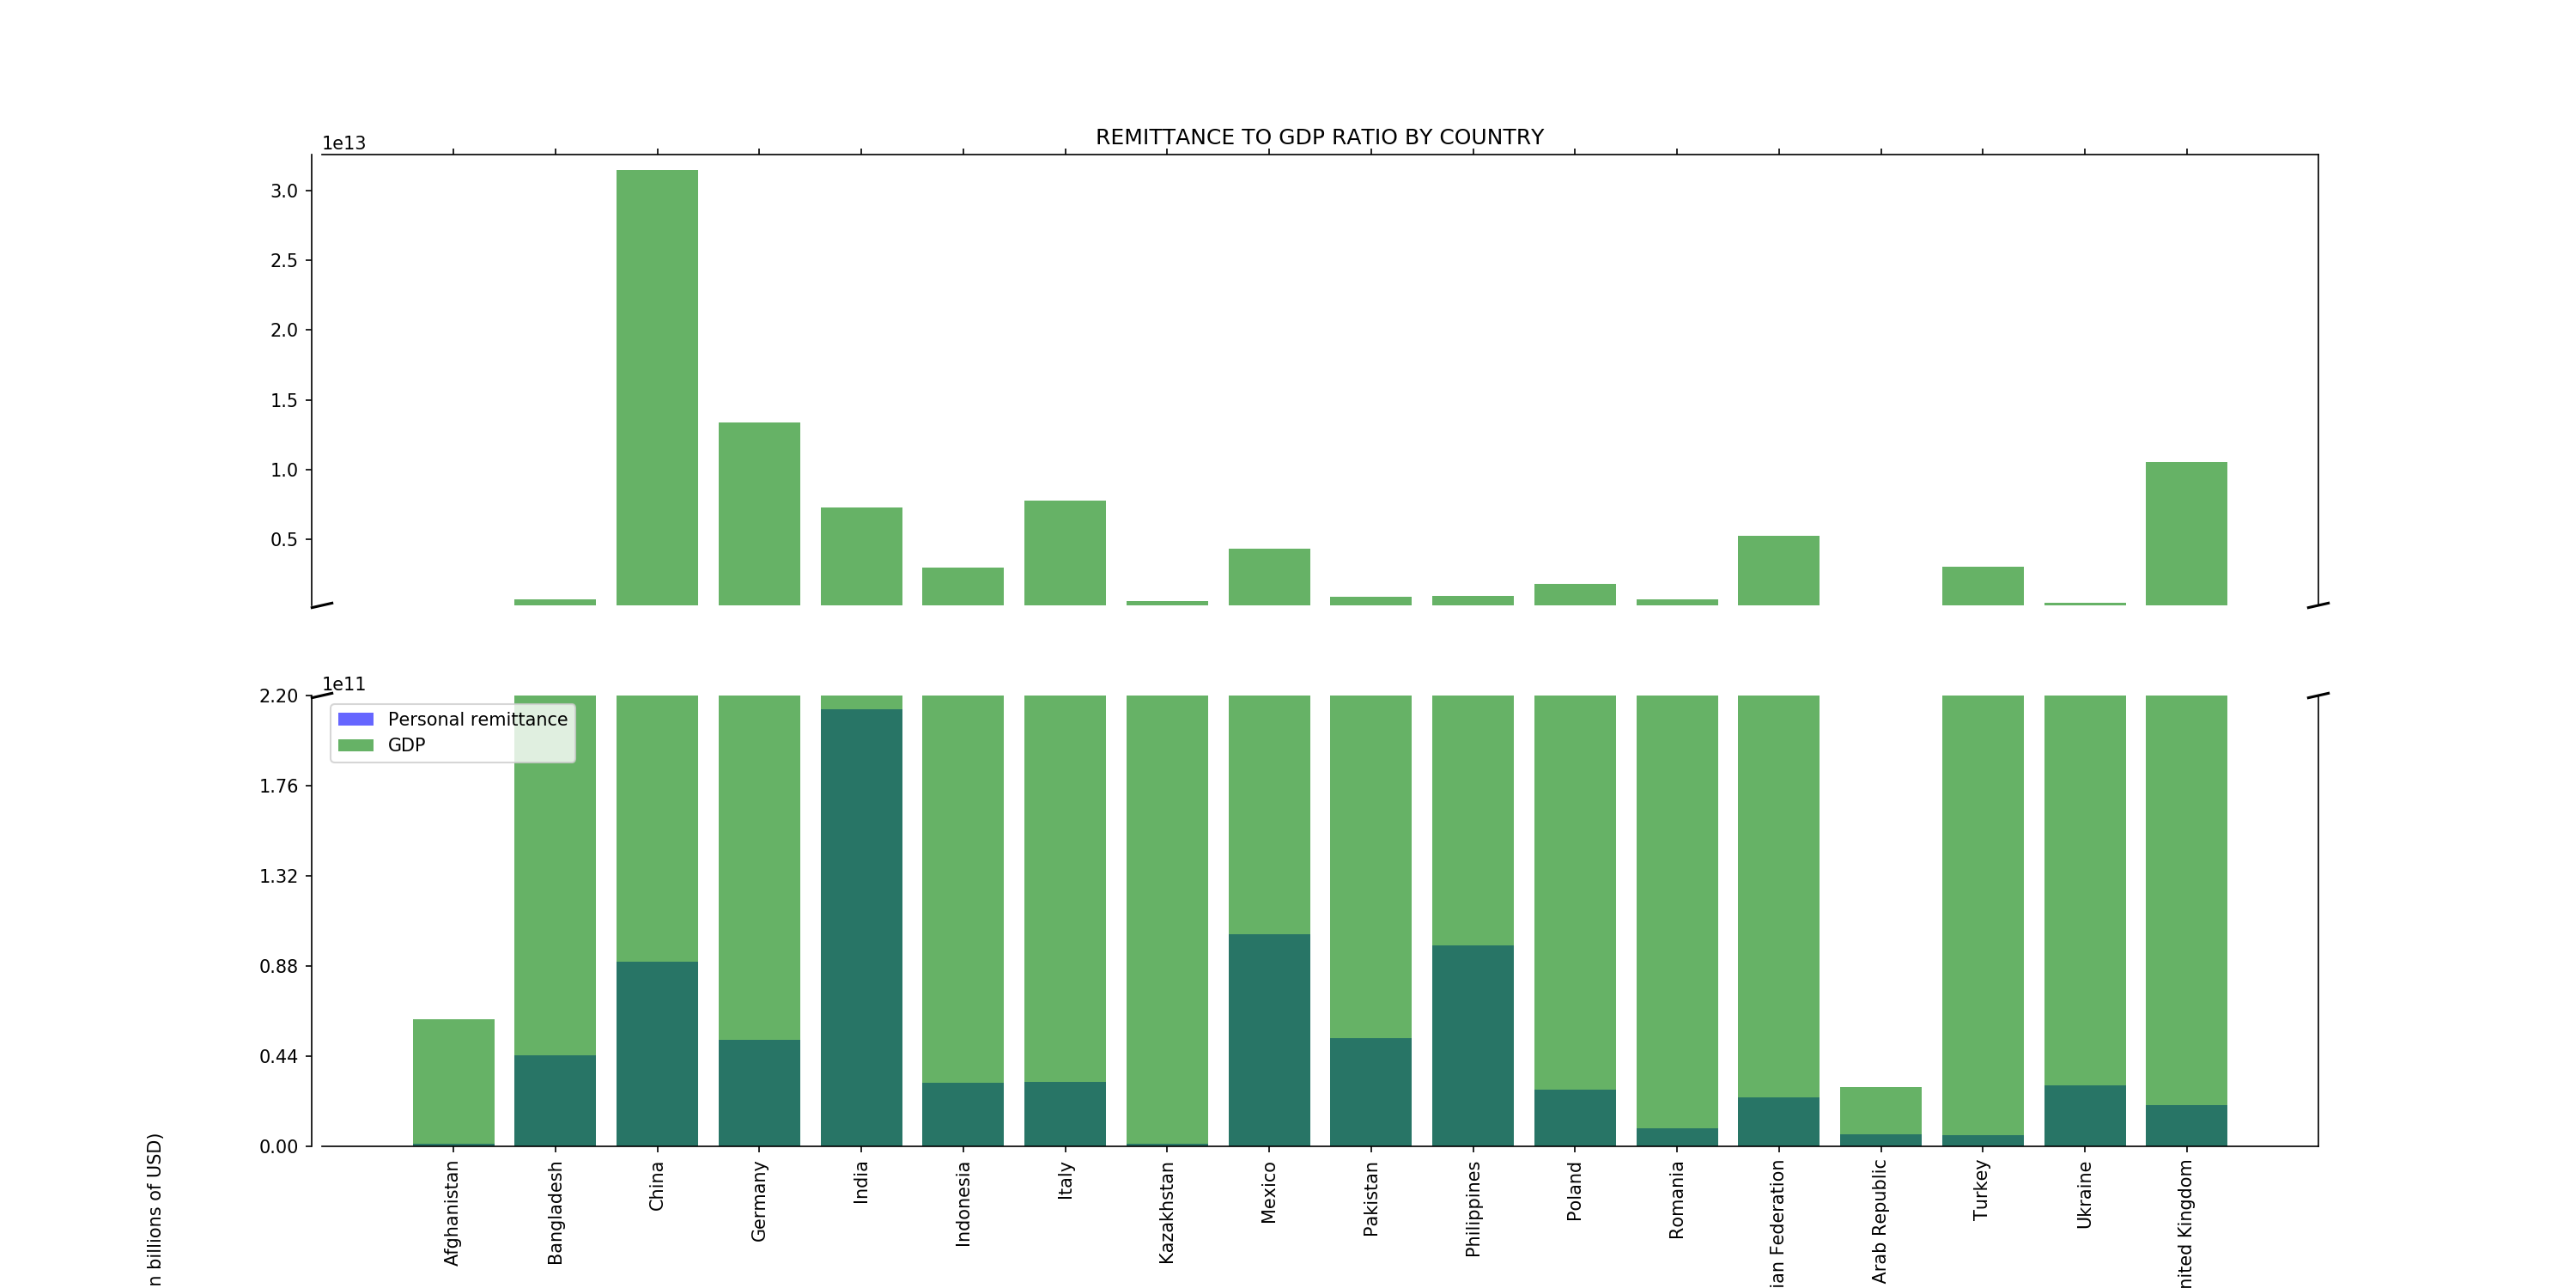

In [21]:
fig, (ax, ax2) = plt.subplots(2, 1,figsize=(20,10), sharex=True)


# plot the same data on both plots
ax.bar(x_axis, y_axis, color='b', alpha=0.6, align="center", label='Personal remittance')
ax2.bar(x_axis, y_axis, color='b', alpha=0.6, align="center",label='Personal remittance')
ax.bar(x_axis, yGDP_axis, color='g', alpha=0.6, align="center",label='GDP')
ax2.bar(x_axis, yGDP_axis, color='g', alpha=0.6, align="center",label='GDP')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(220000000000, 32620000000000)  # GDP
ax2.set_ylim(0, 220000000000)  # Remittances
ax2.yaxis.set_major_locator(MultipleLocator(44000000000))

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax.spines['left'].set_position(('outward', 6))
ax2.spines['left'].set_position(('outward', 6))
ax2.tick_params(axis='x', rotation=90)


#ax2.xticks(np.arange(min(x), max(x)+1, 1.0))

#plt.xticks(x_axis, x_axis, rotation='vertical')

d = .005  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal



def set_verticalalignment(self, align):
    cbook._check_in_list(['top', 'bottom', 'center', 'baseline', 'center_baseline'],align=top)
    self._verticalalignment = top
    self.stale = True

plt.xlabel("COUNTRIES OF ORIGIN")
plt.text(-3,405,"REMITTANCE TO GDP RATIO (in billions of USD)",rotation=90 )
ax.set_title('REMITTANCE TO GDP RATIO BY COUNTRY')

plt.savefig("../Output/Images/Remittance_GDP_Ratio_by_Country.png")

plt.legend()
#plt.tight_layout()
plt.show()